# **Importation des bibliothèques nécessaires**

In [17]:
import pandas as pd  # Pour la manipulation des données\import numpy as np  # Pour les opérations numériques
import matplotlib.pyplot as plt  # Pour les visualisations
import seaborn as sns  # Pour des visualisations avancées
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Pour la normalisation et l'encodage
from sklearn.compose import ColumnTransformer  # Pour appliquer des transformations sur différentes colonnes
from sklearn.pipeline import Pipeline  # Pour chaîner les étapes de traitement et de modélisation
from sklearn.impute import SimpleImputer  # Pour gérer les valeurs manquantes
from sklearn.linear_model import LogisticRegression  # Modèle de régression logistique
from sklearn.neighbors import KNeighborsClassifier  # Modèle KNN
from sklearn.tree import DecisionTreeClassifier  # Modèle Arbre de Décision
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Modèles avancés
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve  # Pour évaluer les performances

# **Charger les données depuis le fichier**

In [18]:
data_path = "./Consigne/bank-additional/bank-additional/bank-additional-full.csv"  # Chemin du fichier CSV
data = pd.read_csv(data_path, sep=";")  # Charger les données avec le bon séparateur

# **Aperçu des données**


In [19]:
print(data.head())  # Affiche les premières lignes du jeu de données

# Statistiques descriptives
print(data.info())  # Informations générales sur les colonnes et les types de données
print(data.describe())  # Statistiques descriptives des colonnes numériques

# Gestion des valeurs manquantes
print(data.isnull().sum())  # Compter les valeurs manquantes

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# **Encodage de la variable cible**

In [20]:
# La variable cible est "y" (yes/no)
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Convertir en valeurs binaires

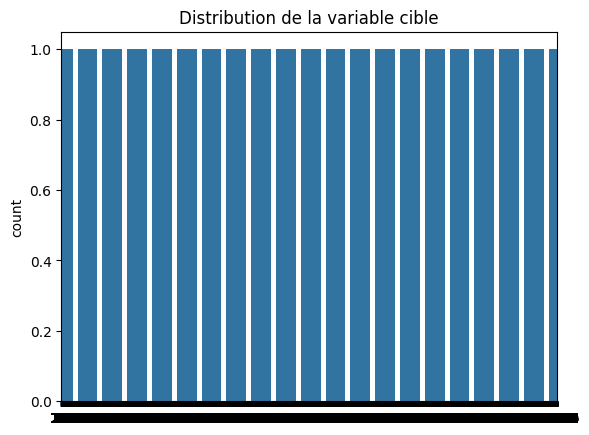

In [21]:
# Visualisation des distributions de variables clés
sns.countplot(data['y'])  # Visualiser la répartition de la variable cible
plt.title('Distribution de la variable cible')
plt.show()

In [22]:
# Variables numériques et catégoriques
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = data.select_dtypes(include=['object']).columns.tolist()

print("Variables numériques:", num_features)
print("Variables catégoriques:", cat_features)

Variables numériques: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Variables catégoriques: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


# **Transformation des données**

In [23]:
# Imputation des valeurs manquantes et normalisation pour les variables numériques
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [24]:
# Encodage OneHot pour les variables catégoriques
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
# Combinaison des transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [26]:
# Diviser les données en ensembles d'entraînement et de test
X = data.drop('y', axis=1)  # Variables explicatives
y = data['y']  # Variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
# Pipeline avec un modèle simple (régression logistique)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [29]:
# Entraînement du modèle
model.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [30]:
# Prédictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [31]:
# Évaluation du modèle
print("Rapport de classification:\n", classification_report(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [32]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.show()

NameError: name 'y_pred_proba' is not defined

In [ ]:
# Sauvegarder le pipeline pour usage ultérieur (si nécessaire)
import joblib
joblib.dump(model, "bank_marketing_model.pkl")  # Sauvegarde du modèle